<a href="https://www.kaggle.com/code/melaneemelanee/digikala-analysis?scriptVersionId=106047938" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

I am [Melanee](https://github.com/Melanee-Melanee) and this notebook is the first [Digikala](https://www.digikala.com/) data analysis on Kaggle developed by me:

https://www.kaggle.com/code/melaneemelanee/digikala-analysis

If you find this notebook useful plz upvote it :). 


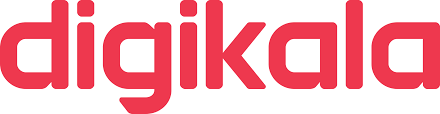

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digikala/digikala/3-p5s3708k.csv
/kaggle/input/digikala/digikala/4-oska9ni8.xlsx
/kaggle/input/digikala/digikala/1-k9d5q7lw.csv
/kaggle/input/digikala/digikala/2-p9vcb5bb.xlsx
/kaggle/input/digikala/digikala/5-awte8wbd.xlsx
/kaggle/input/digikala/digikala/digikala/3-p5s3708k.csv
/kaggle/input/digikala/digikala/digikala/4-oska9ni8.xlsx
/kaggle/input/digikala/digikala/digikala/1-k9d5q7lw.csv
/kaggle/input/digikala/digikala/digikala/2-p9vcb5bb.xlsx
/kaggle/input/digikala/digikala/digikala/5-awte8wbd.xlsx


In [2]:
df = pd.read_csv('../input/digikala/digikala/3-p5s3708k.csv')

In [3]:
#lets see the shape of dataset(the number of rows, the number of columns)
df.shape

(200000, 7)

In [4]:
df.head(10-20)

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199985,6194722,483447,7108,2017-01-27 21:55:48.000,3623853.0,همدان,1.0
199986,22105540,4343929,738895,2018-08-30 09:42:40.000,192156.0,تهران,2.0
199987,12099975,6835494,404202,2018-03-29 00:02:54.000,119266.0,رشت,1.0
199988,11347656,5882546,556280,2018-02-23 10:44:40.000,4946606.0,هادی شهر,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [6]:
df.describe()

,ID_Order,ID_Customer,ID_Item,Amount_Gross_Order,Quantity_item
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000
mean,9.871963e+06,2.860671e+06,3.757313e+05,1.458204e+06,1.261225
std,6.404275e+06,1.921815e+06,3.948462e+05,5.450972e+06,1.801186
min,1.000411e+06,4.661320e+05,7.600000e+01,0.000000e+00,1.000000
25%,5.022253e+06,1.021053e+06,8.955725e+04,1.212730e+05,1.000000
50%,8.591270e+06,2.895180e+06,2.302210e+05,3.211010e+05,1.000000
75%,1.246037e+07,4.179218e+06,5.192668e+05,1.011032e+06,1.000000
max,2.484656e+07,7.282118e+06,2.093722e+06,1.530000e+09,500.000000


In [7]:
df['Amount_Gross_Order'].describe()

count    2.000000e+05
mean     1.458204e+06
std      5.450972e+06
min      0.000000e+00
25%      1.212730e+05
50%      3.211010e+05
75%      1.011032e+06
max      1.530000e+09
Name: Amount_Gross_Order, dtype: float64

* We can see that the Minimum value is 0 and Maximum value is 433014, there is huge difference so both mean and median function would not work for replacing null values if we had.
* Also, there is a huge difference in the 25th, 50th, and 75th percentiles indicating that if we impute the values for "Amount_Gross_Order" column we will most probably introduce bias into the data.

In [8]:
df[['Amount_Gross_Order','Quantity_item']].describe()

,Amount_Gross_Order,Quantity_item
count,2.000000e+05,200000.000000
mean,1.458204e+06,1.261225
std,5.450972e+06,1.801186
min,0.000000e+00,1.000000
25%,1.212730e+05,1.000000
50%,3.211010e+05,1.000000
75%,1.011032e+06,1.000000
max,1.530000e+09,500.000000


In [9]:
#check the mean value for 'Amount_Gross_Order' column:
df['Amount_Gross_Order'].mean()

1458204.043815

So the average amount of gross order was:1458204.043815 tomans(rials)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


# Checking missing values

In [11]:
# lets first check if there is any null value present in the data
df.isnull().sum().sum()

0

In [12]:
# lets check the number of missing values in the dataset
# we are check the missing values in the context of columns
df.isnull().sum()

ID_Order                 0
ID_Customer              0
ID_Item                  0
DateTime_CartFinalize    0
Amount_Gross_Order       0
city_name_fa             0
Quantity_item            0
dtype: int64

In [13]:
#removing missing values
#documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df.dropna()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [14]:
#lets check the info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


In [15]:
# percentage of missing values
percentage_of_missing_values = round(100*(df.isnull().sum()/len(df.index)), 2)
print(percentage_of_missing_values)

ID_Order                 0.0
ID_Customer              0.0
ID_Item                  0.0
DateTime_CartFinalize    0.0
Amount_Gross_Order       0.0
city_name_fa             0.0
Quantity_item            0.0
dtype: float64


In [16]:
df['city_name_fa'].value_counts()


تهران         108306
مشهد            6024
اصفهان          5992
کرج             5934
اهواز           4313
               ...  
قلندر آباد         1
مشهدریزه           1
کاریز              1
مجن                1
خوزی               1
Name: city_name_fa, Length: 906, dtype: int64

In [17]:
#lets see all cities
print(df['city_name_fa'].unique())
print('Total number of unique cities are:', df['city_name_fa'].nunique())

['محمود آباد' 'خرمدره' 'قرچک' 'قم' 'تهران' 'مشهد' 'اصفهان' 'رشت' 'خرمشهر'
 'لالی' 'تنکابن' 'کرج' 'اهواز' 'شاهین شهر' 'زنجان' 'ساری' 'کلور' 'هچیرود'
 'مبارکه' 'آبادان' 'کیش' 'بندر انزلی' 'بروجرد' 'قائم شهر' 'آستانه اشرفیه'
 'شیراز' 'آمل' 'کرمانشاه' 'بوشهر' 'قزوین' 'بندر عباس' 'نیشابور' 'تبریز'
 'اراک' 'ایلام' 'لاهیجان' 'علی آباد' 'یزد' 'زابل' 'شهرکرد' 'رویدر'
 'کبودر آهنگ' 'تاکستان' 'هشتگرد' 'گرگان' 'خمام' 'ورزنه' 'گنبدکاووس'
 'همدان' 'زرند' 'نوشهر' 'هادیشهر' 'شهریار' 'فلاورجان' 'کازرون' 'دیواندره'
 'خمین' 'صغاد' 'شهر جدید صدرا' 'کرمان' 'بیرجند' 'آستارا' 'اردبیل' 'دزفول'
 'نجف آباد' 'دورود' 'سمنان' 'ساوه' 'خرم آباد' 'سربیشه' 'سبزوار' 'سیاهکل'
 'فومن' 'اسلام آباد غرب' 'اسلامشهر' 'سردشت' 'جیرفت' 'فردیس' 'شبستر'
 'لنگرود' 'گرمدره' 'طرقبه' 'شوش' 'آشخانه' 'ارزوئیه' 'میاندوآب' 'الیگودرز'
 'تربت جام' 'کوهدشت' 'یاسوج' 'بستک' 'درگهان' 'تویسرکان' 'زاهدان' 'ارومیه'
 'تفت' 'گلپایگان' 'لار' 'بهبهان' 'پاکدشت' 'حمیل' 'الوند' 'لالجین' 'ابهر'
 'سر پل ذهاب' 'بهشهر' 'چالوس' 'اردکان' 'منوجان' 'پردیس' 'قشم'

# Ckecking Outliers

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


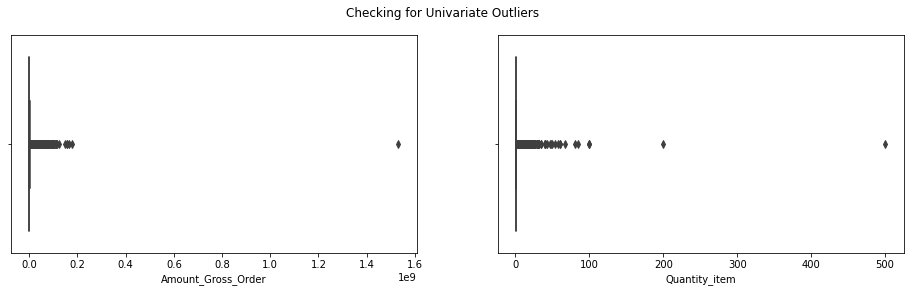

In [18]:
#checking univariate outliers for int data
plt.rcParams['figure.figsize']=(16,4)
plt.subplot(1,2,1)
sns.boxplot(df['Amount_Gross_Order'])

plt.subplot(1,2,2)
sns.boxplot(df['Quantity_item'])

plt.suptitle("Checking for Univariate Outliers")
plt.show()

The results show that **Tehran** had the most orders among other cities. 

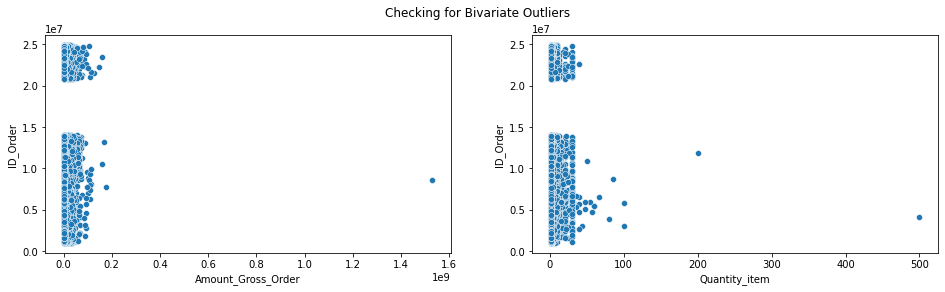

In [19]:
#Checking for the bivariate outliers wrt Target variable.

plt.subplot(1,2,1)
sns.scatterplot(y=df['ID_Order'],x=df['Amount_Gross_Order'])

plt.subplot(1,2,2)
sns.scatterplot(y=df['ID_Order'],x=df['Quantity_item'])


plt.suptitle("Checking for Bivariate Outliers")
plt.show()

In [20]:
#Capping the outliers in the columns having values greater than 50.
df['Quantity_item'].values[df['Quantity_item'].values>50]=50


In [21]:
df['Amount_Gross_Order'].values[df['Amount_Gross_Order'].values>200000000]=200000000

In [22]:
#Checking if there is still any value greater than 10000 left in the Quantity_item column

df[df['Quantity_item']>50]
df[df['Amount_Gross_Order']>200000000]


,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item


In [23]:
#Dealing with the bivariate outliers
#we delete all the values which are greater than 50 

df=df[~(df['Quantity_item']>50)]
df=df[~(df['Amount_Gross_Order']>200000000)]

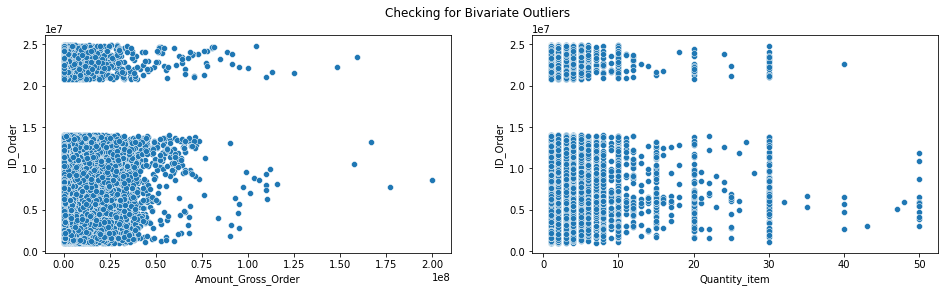

In [24]:
#checking again
plt.subplot(1,2,1)
sns.scatterplot(y=df['ID_Order'],x=df['Amount_Gross_Order'])

plt.subplot(1,2,2)
sns.scatterplot(y=df['ID_Order'],x=df['Quantity_item'])


plt.suptitle("Checking for Bivariate Outliers")
plt.show()

# Splitting in string data

In [25]:
df['DateTime_CartFinalize'].str.split(' ')


0         [2015-10-15, 08:50:56.000]
1         [2018-02-11, 00:29:26.000]
2         [2016-06-14, 00:30:08.000]
3         [2018-09-03, 14:37:19.000]
4         [2016-05-21, 11:51:02.000]
                     ...            
199995    [2018-04-03, 12:07:01.000]
199996    [2016-07-09, 19:14:09.000]
199997    [2017-03-08, 23:47:06.000]
199998    [2017-02-08, 14:59:39.000]
199999    [2017-06-17, 10:08:06.000]
Name: DateTime_CartFinalize, Length: 200000, dtype: object

In [26]:
df = df.explode('DateTime_CartFinalize')
pd.set_option('max_rows', 200000)
df['DateTime_CartFinalize'].value_counts()[:20]



2017-05-07 16:07:39.000    4
2016-02-23 09:03:50.000    4
2016-05-17 17:40:25.000    4
2016-06-06 02:12:05.000    4
2016-02-29 13:23:57.000    4
2016-10-02 18:53:37.000    3
2016-11-11 03:17:26.000    3
2017-09-18 15:13:22.000    3
2018-04-24 16:12:30.000    3
2016-09-04 23:39:08.000    3
2017-02-28 18:54:49.000    3
2016-10-08 16:35:53.000    3
2018-07-11 17:55:40.000    3
2017-11-24 22:41:51.000    3
2017-02-17 18:13:19.000    3
2017-02-10 17:18:36.000    3
2016-07-14 16:22:13.000    3
2016-12-20 00:23:14.000    3
2016-07-23 20:10:09.000    3
2018-04-09 16:12:34.000    3
Name: DateTime_CartFinalize, dtype: int64

Digikiala had the most orders in these times:
2017-05-07 16:07:39.000    
2016-02-23 09:03:50.000    
2016-05-17 17:40:25.000    
2016-06-06 02:12:05.000    
2016-02-29 13:23:57.000    

# Visuailization 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


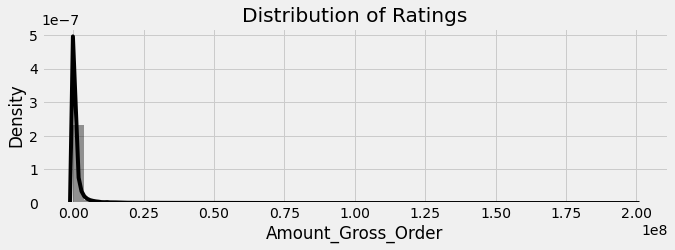

In [27]:
plt.rcParams['figure.figsize'] = (10, 3)
plt.style.use('fivethirtyeight')
sns.distplot(df['Amount_Gross_Order'], color = 'black')
plt.title('Distribution of Ratings')
plt.show()


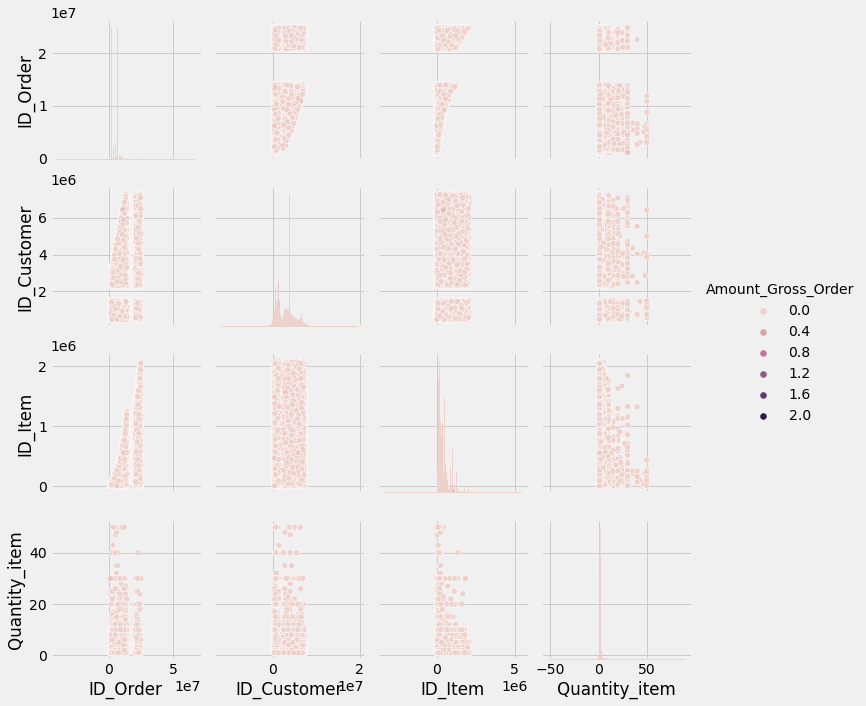

In [28]:

sns.pairplot(data = df, hue="Amount_Gross_Order")
#sns.pairplot(df['Amount_Gross_Order'], df['ID_Order'], data=df)
#sns.barplot(df['ID_Order'])



In [29]:
df.corr()

,ID_Order,ID_Customer,ID_Item,Amount_Gross_Order,Quantity_item
ID_Order,1.000000,0.326708,0.774618,-0.036480,0.016657
ID_Customer,0.326708,1.000000,0.259381,-0.005255,-0.000166
ID_Item,0.774618,0.259381,1.000000,-0.001355,-0.009927
Amount_Gross_Order,-0.036480,-0.005255,-0.001355,1.000000,-0.045482
Quantity_item,0.016657,-0.000166,-0.009927,-0.045482,1.000000


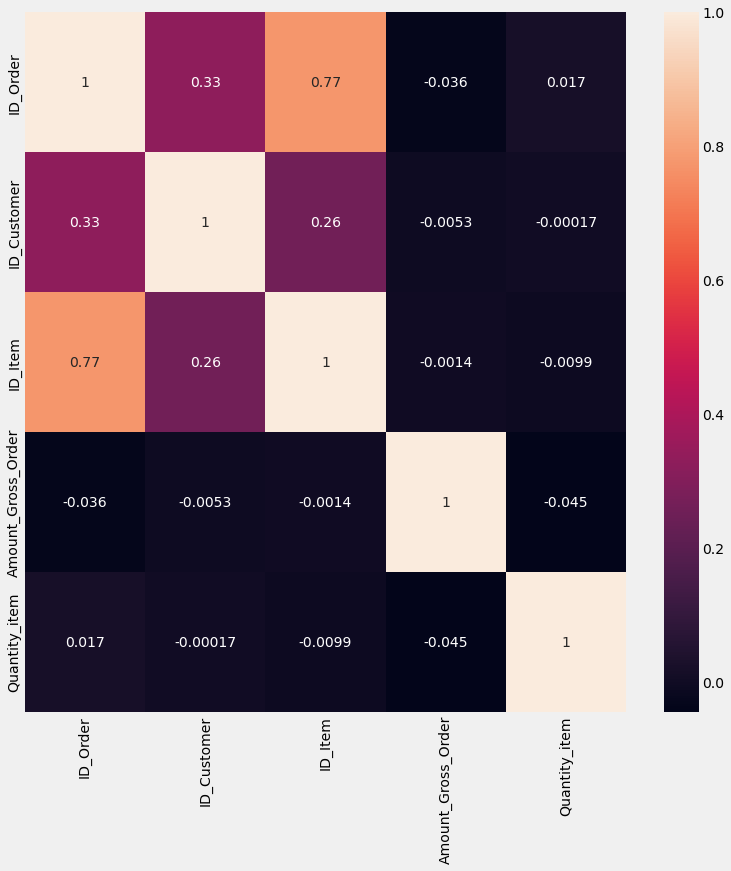

In [30]:
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()